In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
num_method = 3;
num_pattern = 10;
window_size = 50;
result =[];

In [37]:
actual_data = pd.read_csv('OutputLSTM/google_window_act.csv',header = None);
actual_data = actual_data[0].tolist()

# WINDOW Based
predicted_data_window_based = pd.read_csv('OutputLSTM/google_window_pred.csv',header = None);
predicted_data_window_based = predicted_data_window_based[0].tolist()

# DAY WISE
predicted_data_day_based = pd.read_csv('OutputLSTM/google_point_pred.csv',header = None);
predicted_data_day_based = predicted_data_day_based[0].tolist()

# WHOLE HISTORY BASED
predicted_data_historical_based = pd.read_csv('OutputLSTM/google_sequence_pred.csv',header = None);
predicted_data_historical_based = predicted_data_historical_based[0].tolist()

pattern_mat = pd.read_csv('OutputLSTM/patterns.csv',header = None);
pattern_mat = pattern_mat.to_numpy()

In [38]:
print(pattern_mat[0][0:50].tolist())

[0.332767706, 0.761729422, 0.987552842, 0.662209078, -0.272361903, 0.086594608, -0.5471011020000001, -0.214106552, 0.257206621, 0.343810312, 0.39287235600000003, -0.192024169, 0.232043293, -0.383590985, 2.391589621, 50.70271769, 12.96218544, 5.49672379, 2.952375092, 2.8202518889999997, -0.36366974700000004, 1.453530177, 0.11933154900000001, 0.932963034, 4.67760768, 3.563824199, 0.943572722, 2.685792928, 2.194207836, 1.529372645, 1.6550808590000001, 0.57935434, 3.5720930230000003, 2.0785947119999997, 1.475605108, 2.0045203419999997, 2.768817204, 1.141236931, 0.576594476, 0.291045899, 0.09414401800000001, 0.798554652, 1.0516365109999999, 2.355887054, 1.788, 0.807278594, 1.820512821, -0.150003842, -0.7061580009999999, -0.303219678]


In [39]:
print(len(actual_data))
print(len(predicted_data_window_based))
print(len(predicted_data_day_based))
print(len(predicted_data_historical_based))

2972
2950
2972
2972


In [40]:
methods = [math.ceil(len(predicted_data_window_based)/ window_size),
           math.ceil(len(predicted_data_day_based)/ window_size), 
           math.ceil(len(predicted_data_historical_based)/ window_size)]

In [41]:
def normalized_cross_correlation(method, window, pattern,count):
    signal1 = [];
    signal2 = [];
    predicted_data = [];
    graph_title1= '';
    graph_title2 = '';
    res = []
    
    if method == 0:
            predicted_data = predicted_data_window_based
            graph_title1 = f"True vs predicted (window based).(w={window+1},p={pattern})"
            graph_title2 = f"Day lag vs normalized cross correlation.(w={window+1},p={pattern})"
            
    elif method == 1:        
            predicted_data = predicted_data_day_based
            graph_title1 = f"True vs predicted (day based).(w={window+1},p={pattern})"
            graph_title2 = f"Day lag vs normalized cross correlation.(w={window+1},p={pattern})"
            
    elif method == 2:
            predicted_data = predicted_data_historical_based
            graph_title1 = f"True vs predicted (whole historical based).(w={window+1},p={pattern})"
            graph_title2 = f"Day lag vs normalized cross correlation.(w={window+1},p={pattern})"
    
    if pattern == 0:
        signal1_start = window * window_size
        signal1_end = signal1_start + window_size
        if len(predicted_data) < signal1_end:
            signal1_end = len(predicted_data)
            
        signal2_start = signal1_start
        signal2_end = signal1_end
        
        signal1 = predicted_data[signal1_start : signal1_end]
        signal2 = actual_data[signal2_start: signal2_end]
        
    elif pattern > 0:
        signal1_start = window * window_size
        signal1_end = signal1_start + window_size
        if len(predicted_data) < signal1_end:
            signal1_end = len(predicted_data)
            
        signal1 = predicted_data[signal1_start : signal1_end]
        signal2 = pattern_mat[pattern-1][0:50]
        signal2 = signal2.tolist()
    
    if len(signal1) == len(signal2):
        cor_sequence,lag = xcorr(signal1,signal2)
        cor_sequence = cor_sequence.tolist()
        lag = lag.tolist()
        if max(cor_sequence) > .90:
            res = res + [method+1, window+1, pattern]
            max_cor = max(cor_sequence)
            ind = cor_sequence.index(max_cor)
            x1= list(range(1,len(signal1) + 1))
            
            figure, axis = plt.subplots(1, 2,figsize = (10,5))
            figure.tight_layout()
            axis[0].plot(x1,signal1)
            axis[0].plot(x1,signal2)
            axis[0].legend(['predicted','actual'])
            axis[0].set_xlabel('day')
            axis[0].set_ylabel('volume')
            axis[0].set_title(graph_title1)
        
            axis[1].plot(lag, cor_sequence)
            axis[1].set_xlabel(f"day_lag\n maximum ncr = {max_cor} and at day lag = {lag[ind]}")
            axis[1].set_ylabel('normalized cross correlation')
            axis[1].set_title(graph_title2)  
            
            name = f"plot {count}.jpg"
            figure.savefig('AnamolyOutput/GOOGLE/' + name)
            plt.show()
            
    return res

In [42]:
def xcorr(x, y):
   
    limit = len(x)
    c = np.correlate(x, y, mode='full')
    n = np.sqrt(np.dot(x, x) * np.dot(y, y)) # this is the transformation function
    c = np.true_divide(c,n)
    lags = np.arange(-(limit-1), limit)
    return c,lags

In [43]:
counter = 1
match = [[0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0]]

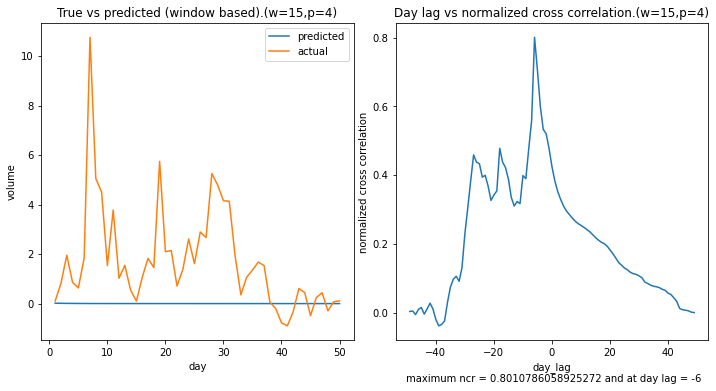

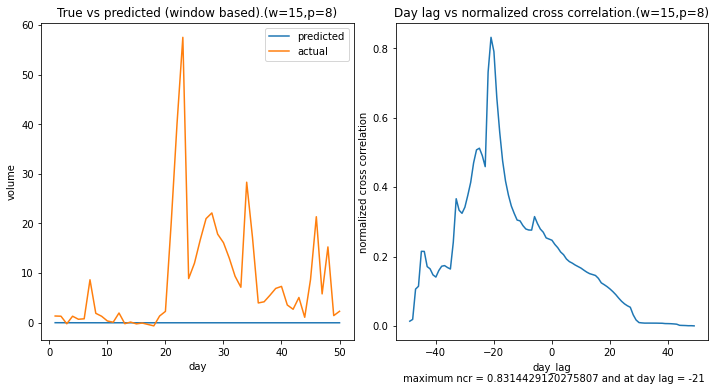

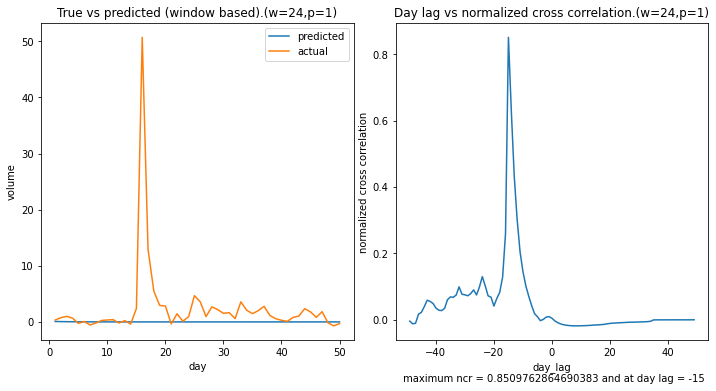

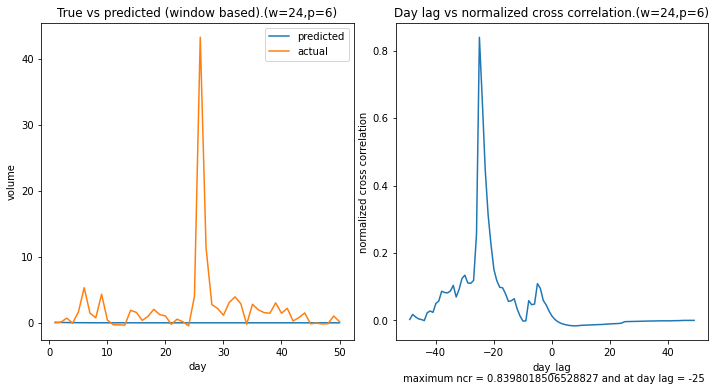

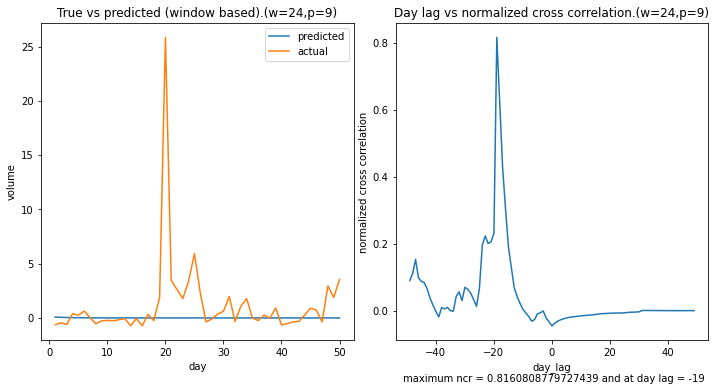

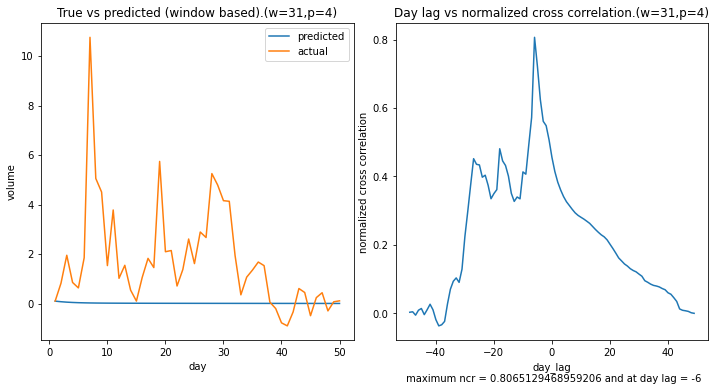

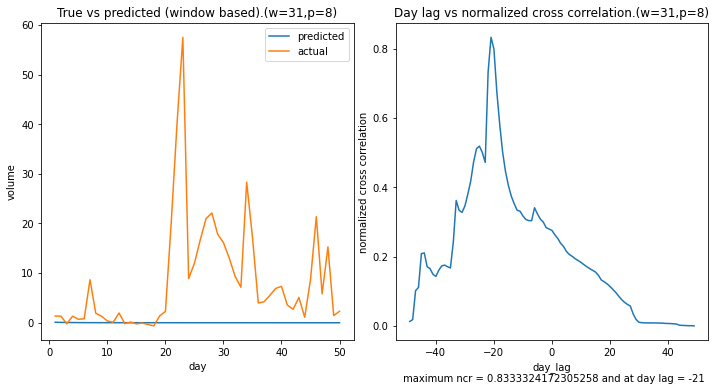

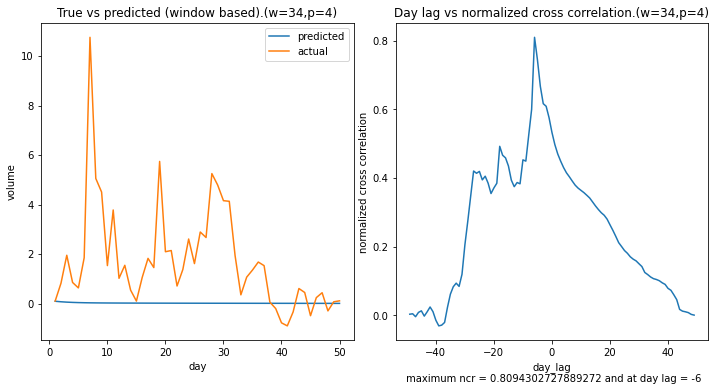

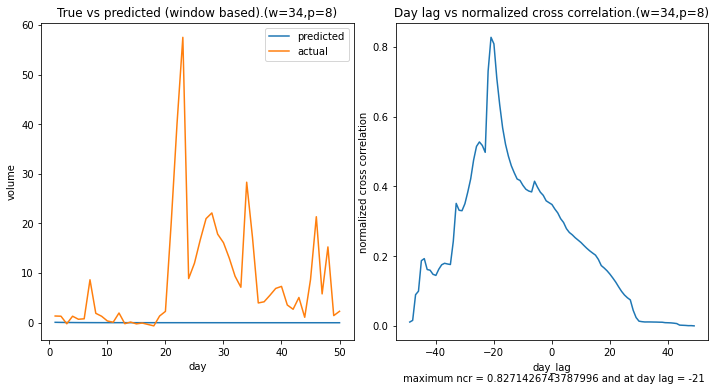

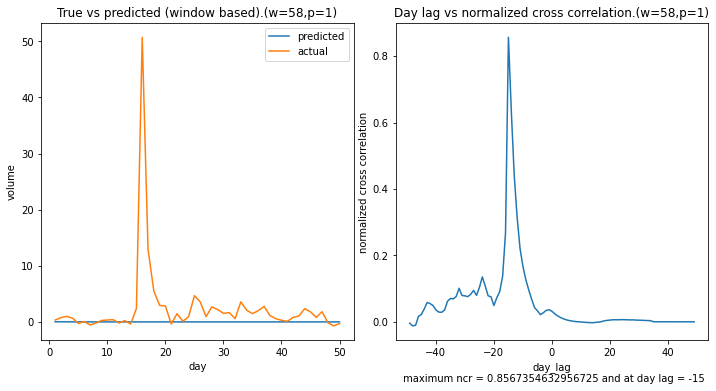

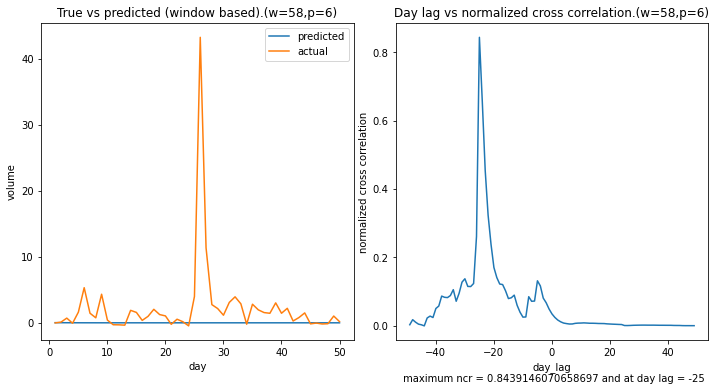

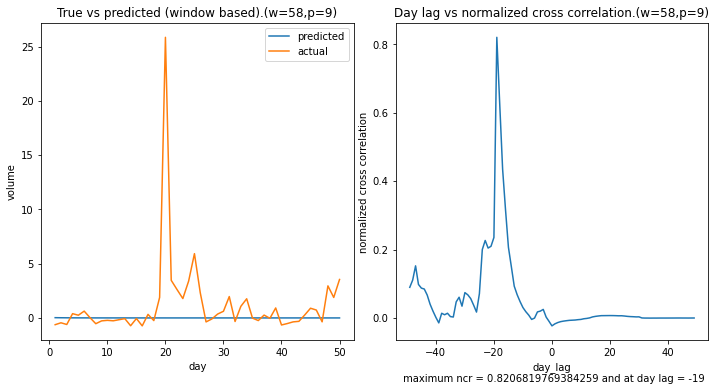

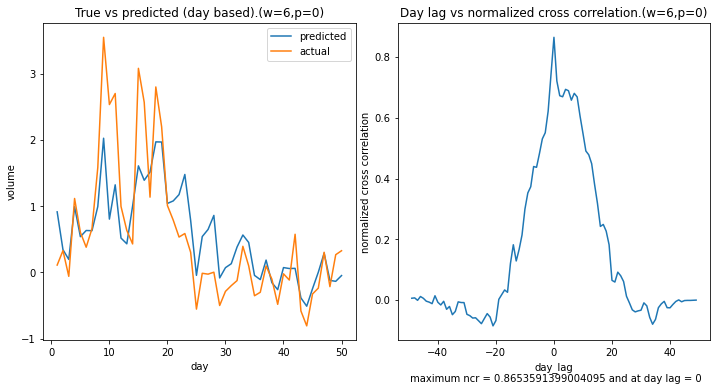

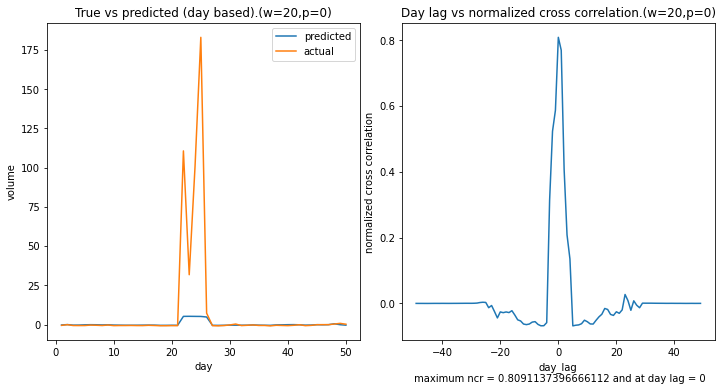

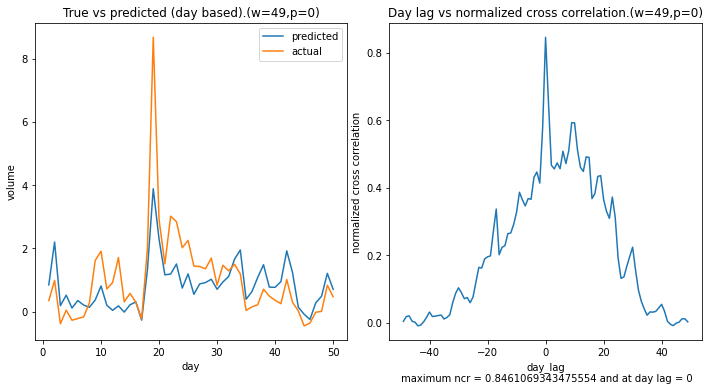

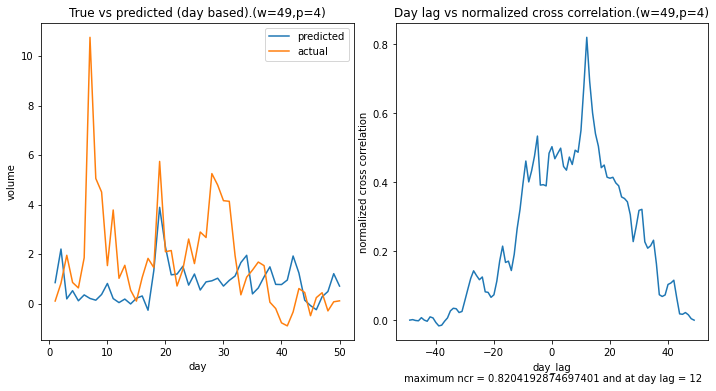

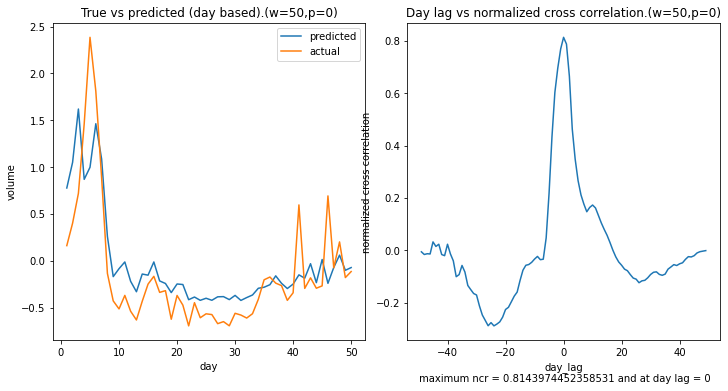

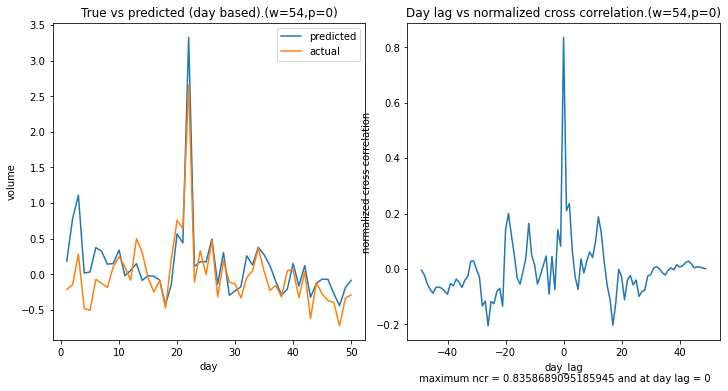

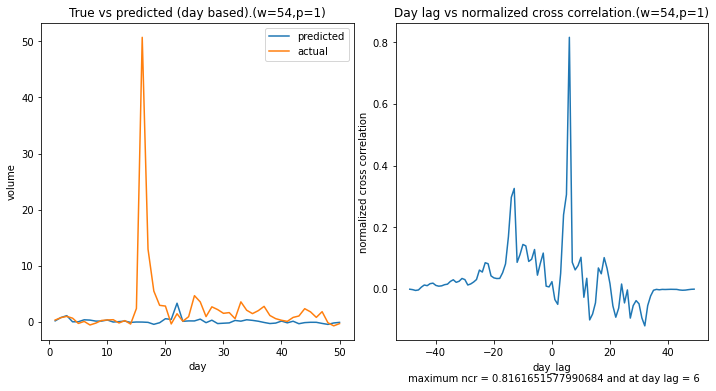

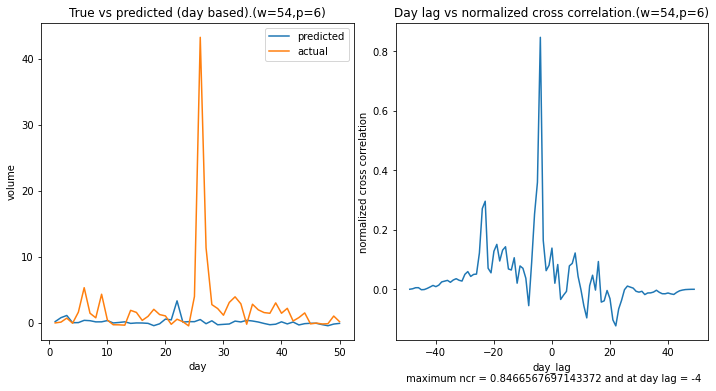

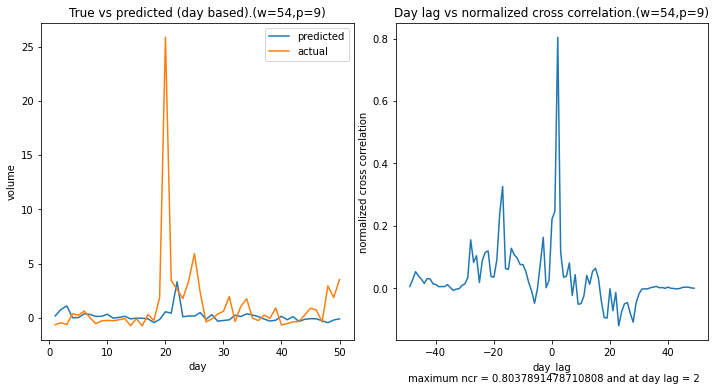

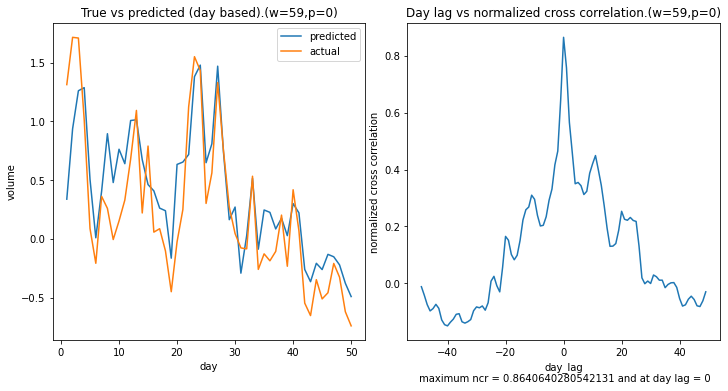

In [44]:
for method in range(3):
    num_window = methods[method]
    for window in range(num_window):
        res  = normalized_cross_correlation(method,window,0,counter)
        if(len(res)>0):
            counter += 1
            result.append(res)
            match[method][0] = match[method][0] + 1
        for pattern in range(num_pattern):
            res = normalized_cross_correlation(method,window,pattern+1,counter)
            if(len(res)>0):
                counter += 1
                result.append(res)
                match[method][pattern+1] = match[method][pattern+1] + 1

In [20]:
print(counter)
match.append('google')
print(match)

23
[[0, 2, 0, 0, 3, 0, 2, 0, 3, 2, 0], [6, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'google']
